## 04. Autograd(자동 미분)
- `torch.autograd` 패키지는 Tensor의 모든 연산에 대해 자동 미분(Auto Differentiation)
- 이는 코드를 어떻게 실행하느냐에 따라 역전파가 정의된다는 뜻
- backprop을 위해 미분값을 자동으로 계산

`required_grad` 속성을 `True`로 설정하면, 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작
기록을 추적하는 것을 중단하려면 `.detach()를` 호출하여 연산 기록으로부터 분리

In [ ]:
import torch

In [2]:
a = torch.randn(3,3)
a = a * 3
print(a)
print(a.requires_grad)

tensor([[ 1.7793, -0.7207, -1.2142],
        [ 8.5825,  0.7096,  4.8369],
        [ 3.6289, -0.1863,  3.0231]])
False


`required_grad_`는 기존 텐서의 `required_grad`값을 바꿔치기(in-place)하여 변경
`grad_fn`: 미분값을 계산한 함수에 대한 정보 저장(어떤 함수에 대해서 backprop을 했는지)

In [4]:
a.requires_grad_(True) # 인플레이스 연산
print(a.requires_grad)

b = (a * a).sum()
print(b)
print(b.grad_fn)

True
tensor(125.0605, grad_fn=<SumBackward0>)


### 기울기(Gradient)

In [5]:
x = torch.ones(3,3,requires_grad=True)
x

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)

In [6]:
y = x + 5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [8]:
z = y * y
out = z.mean()
print(z, out)

tensor([[36., 36., 36.],
        [36., 36., 36.],
        [36., 36., 36.]], grad_fn=<MulBackward0>) tensor(36., grad_fn=<MeanBackward0>)


계산 완료 후, `.backward()`를 호출하면 자동으로 역전파 계산이 가능하고, `.grad` 속성에 누적됨

In [9]:
print(out)
out.backward()

tensor(36., grad_fn=<MeanBackward0>)


`grad`: data가 거쳐온 layer에 대한 미분값 저장

In [10]:
print(x)
print(x.grad)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333]])


In [18]:
x = torch.randn(3, requires_grad=True)
y = x * 2

while y.data.norm() < 1000:
  y = y * 2

print(y)

tensor([ 122.8186, 1467.1000, -678.9227], grad_fn=<MulBackward0>)


In [19]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)
v

tensor([1.0000e-01, 1.0000e+00, 1.0000e-04])

- `with torch.no_grad()`를 사용하여 기울기의 업데이트를 하지 않음
- 기록을 추적하는 것을 방지하기 위해 코드 블럭을 `with torch.no_grad()`로 감싸면 기울기 계산은 필요없지만, 
- `required_grad=True`로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가할 때 유용

In [21]:
print(x.requires_grad)
print((x**2).requires_grad)

with torch.no_grad():
  print((x**2).requires_grad)

True
True
False


`detach()`: 내용물은 같지만 새로운 Tensor를 가져올 때

In [22]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


### 자동 미분 흐름 예제

In [24]:
a = torch.ones(2,2, requires_grad=True)
print(a)
print(a.grad)
print(a.grad_fn)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
None
None


b = a + 2

In [25]:
b = a + 2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


c = b2

In [28]:
c = b ** 2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [29]:
out = c.sum()
print(out)

tensor(36., grad_fn=<SumBackward0>)


In [31]:
out.backward()

In [33]:
print(a)
print(a.grad)
print(a.grad_fn)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[6., 6.],
        [6., 6.]])
None


In [34]:
print(b)
print(b.grad)
print(b.grad_fn)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)
None


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_17928\1723167935.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\cb\pytorch_1000000000000\work\build\aten\src\ATen/core/TensorBody.h:494.)
  print(b.grad)


In [35]:
print(c)
print(c.grad)
print(c.grad_fn)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)
None


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_17928\3290463661.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\cb\pytorch_1000000000000\work\build\aten\src\ATen/core/TensorBody.h:494.)
  print(c.grad)


In [36]:
print(out)
print(out.grad)
print(out.grad_fn)

tensor(36., grad_fn=<SumBackward0>)
None


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_17928\4170565533.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\cb\pytorch_1000000000000\work\build\aten\src\ATen/core/TensorBody.h:494.)
  print(out.grad)


In [40]:
x = torch.linspace(0, 10, 100).view(-1, 1)
y = 3 * x + 2 + torch.randn(100, 1) * 2  # 노이즈 추가
y

tensor([[-1.4404],
        [ 1.0335],
        [ 2.6938],
        [ 1.8650],
        [-1.1043],
        [ 2.3147],
        [ 4.1038],
        [ 8.1429],
        [ 5.8565],
        [ 3.6533],
        [ 3.7039],
        [ 5.3817],
        [ 6.7637],
        [ 6.2285],
        [ 6.4837],
        [ 8.3771],
        [ 9.8864],
        [ 6.8938],
        [ 6.9808],
        [ 5.3872],
        [ 9.6504],
        [ 5.4138],
        [ 7.4974],
        [ 6.5180],
        [10.8007],
        [11.5765],
        [10.5391],
        [ 7.3370],
        [11.0872],
        [ 9.2197],
        [12.3606],
        [ 7.2169],
        [11.8349],
        [ 9.6907],
        [11.7957],
        [11.6467],
        [12.2889],
        [12.3079],
        [13.4343],
        [10.1868],
        [16.7263],
        [16.3540],
        [12.1526],
        [11.0042],
        [14.2014],
        [16.8599],
        [17.4709],
        [13.9137],
        [20.9931],
        [18.1637],
        [17.2470],
        [14.8962],
        [16.

Epoch [100/1000], Loss: 4.1846
Epoch [200/1000], Loss: 4.1716
Epoch [300/1000], Loss: 4.1668
Epoch [400/1000], Loss: 4.1651
Epoch [500/1000], Loss: 4.1644
Epoch [600/1000], Loss: 4.1642
Epoch [700/1000], Loss: 4.1641
Epoch [800/1000], Loss: 4.1641
Epoch [900/1000], Loss: 4.1640
Epoch [1000/1000], Loss: 4.1640


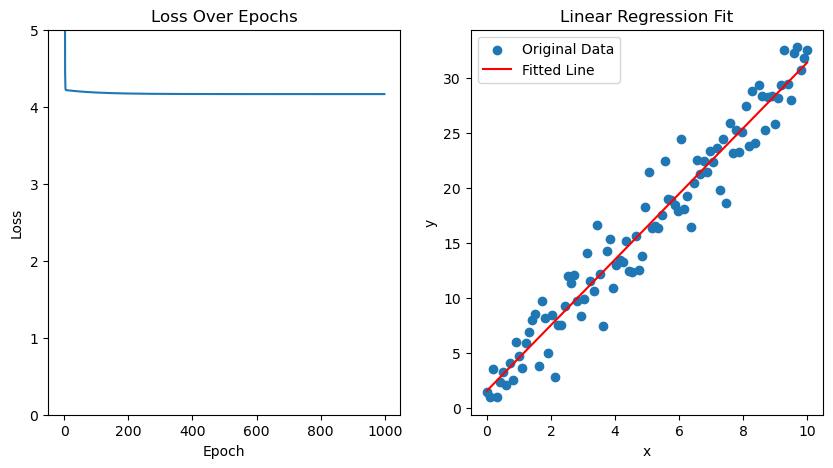

Model Parameters:
linear.weight: tensor([[2.9838]])
linear.bias: tensor([1.5950])


In [47]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 1. 데이터 생성
# y = 3x + 2 + noise
# Training set
x = torch.linspace(0, 10, 100).view(-1, 1)  # 100개의 데이터를 1열로 변환
# 정답 레이블
y = 3 * x + 2 + torch.randn(100, 1) * 2  # 노이즈 추가

# 2. 선형 모델 정의
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # 입력 1개, 출력 1개

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()

# 3. 손실 함수와 옵티마이저 설정
criterion = nn.MSELoss()  # 평균 제곱 오차
optimizer = optim.SGD(model.parameters(), lr=0.01)  # 확률적 경사 하강법

# 4. 학습 루프
epochs = 1000 # 하이퍼 파라미터
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()  # 기울기 초기화
    outputs = model(x)  # Training Set에 따라 예측값 계산
    loss = criterion(outputs, y)  # 레이블과 비교한 손실 계산
    loss.backward()  # 역전파
    optimizer.step()  # 가중치 업데이트

    losses.append(loss.item())

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

# 5. 결과 시각화
plt.figure(figsize=(10, 5))

# 손실 감소 그래프
plt.subplot(1, 2, 1)
plt.ylim(0,5)
plt.plot(losses)
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# 데이터와 예측 결과 시각화
plt.subplot(1, 2, 2)
plt.scatter(x.numpy(), y.numpy(), label='Original Data')
plt.plot(x.numpy(), model(x).detach().numpy(), color='red', label='Fitted Line')
plt.title('Linear Regression Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

# 최종 모델 파라미터 확인
print("Model Parameters:")
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")


epoch: 100 / 1000, loss:  3.4427
epoch: 200 / 1000, loss:  3.4321
epoch: 300 / 1000, loss:  3.4224
epoch: 400 / 1000, loss:  3.4133
epoch: 500 / 1000, loss:  3.4049
epoch: 600 / 1000, loss:  3.3971
epoch: 700 / 1000, loss:  3.3898
epoch: 800 / 1000, loss:  3.3830
epoch: 900 / 1000, loss:  3.3767
epoch: 1000 / 1000, loss:  3.3709


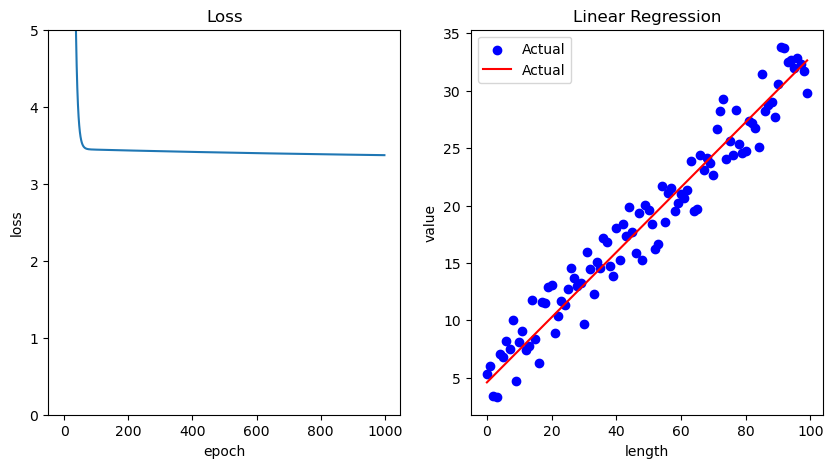

linear.weight Parameter containing:
tensor([[3.1163]], requires_grad=True)
linear.bias Parameter containing:
tensor([1.4797], requires_grad=True)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 데이터 입출력
x = torch.linspace(1,10,100).view(-1,1)
y = 3 * x + 2 + torch.randn(100,1) * 2

# 모델 정의
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(1, 1)

  def forward(self, x):
    return self.linear(x)

model = LinearRegressionModel()

# 손실함수 정의
loss_function = nn.MSELoss()

# 학습진행 및 가중치 업데이트, 가중치랑 편향 넣어줘야 함
optimizer = optim.SGD(model.parameters(), lr=0.001)
epochs = 1000
losses = []

for epoch in range(epochs):
  optimizer.zero_grad()
  outputs = model(x)
  loss = loss_function(outputs, y)
  loss.backward()
  optimizer.step()

  losses.append(loss.item())

  if (epoch+1) % 100 == 0:
    print(f"epoch: {epoch+1} / {epochs}, loss: {loss: .4f}")

plt.figure(figsize=(10,5))

# 손실 그래프
plt.subplot(1,2,1)
plt.plot(losses)
plt.ylim(0,5)
plt.title("Loss")
plt.xlabel("epoch")
plt.ylabel("loss")

# 데이터
plt.subplot(1,2,2)
plt.scatter(range(len(y)), y.numpy(), label="Actual", color="blue")
plt.plot(range(len(x)), model(x).detach().numpy(), label="Actual", color="red")
plt.title("Linear Regression")
plt.xlabel("length")
plt.ylabel("value")
plt.legend()
plt.show()

print("Model Parameters:")
for name, params in model.named_parameters():
  print(name, params)

Epoch [100/1000], Loss: 4.7936
Epoch [200/1000], Loss: 3.9002
Epoch [300/1000], Loss: 3.5287
Epoch [400/1000], Loss: 3.2370
Epoch [500/1000], Loss: 3.0057
Epoch [600/1000], Loss: 2.8223
Epoch [700/1000], Loss: 2.6767
Epoch [800/1000], Loss: 2.5610
Epoch [900/1000], Loss: 2.4691
Epoch [1000/1000], Loss: 2.3960

학습된 모델의 파라미터:
Weights: tensor([[0.2075, 0.3705, 0.0312]])
Bias: tensor([0.3249])


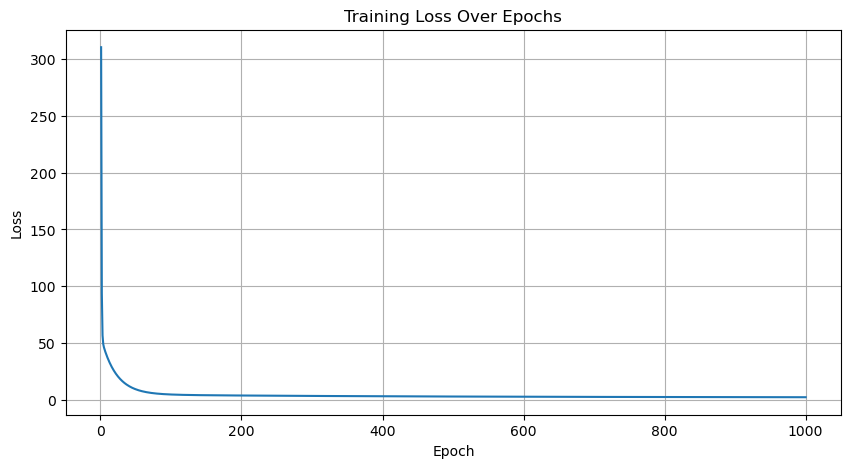

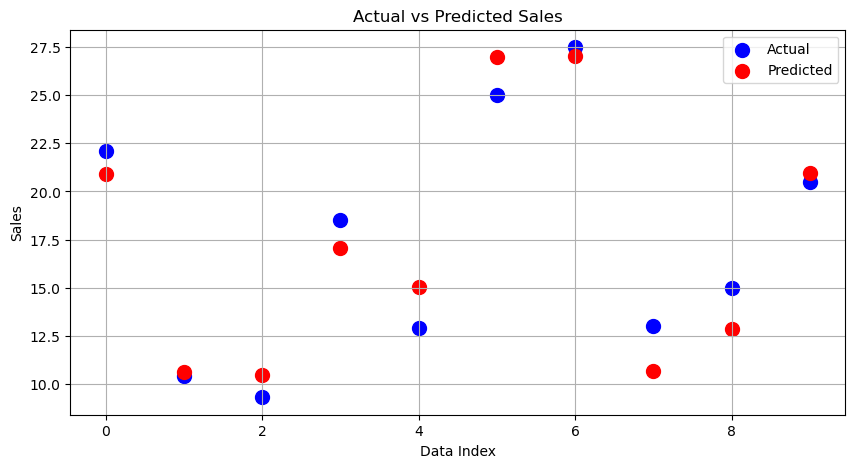

In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 데이터 정의 (10개 샘플)
X = torch.tensor([[50.0, 25.0, 30.0],
                  [10.0, 20.0, 25.0],
                  [5.0, 22.0, 30.0],
                  [30.0, 26.0, 28.0],
                  [40.0, 15.0, 28.0],
                  [60.0, 35.0, 40.0],
                  [70.0, 30.0, 35.0],
                  [20.0, 15.0, 20.0],
                  [25.0, 18.0, 22.0],
                  [45.0, 28.0, 30.0]], dtype=torch.float32)

y = torch.tensor([[22.1], [10.4], [9.3], [18.5], [12.9], 
                  [25.0], [27.5], [13.0], [15.0], [20.5]], dtype=torch.float32)

# 모델 정의
class MultipleLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)  # 입력 3개, 출력 1개

    def forward(self, x):
        return self.linear(x)

model = MultipleLinearRegression()

# 손실 함수 및 최적화 알고리즘
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001)

# 학습
epochs = 1000
loss_history = []
for epoch in range(epochs):
    predictions = model(X)
    loss = loss_function(predictions, y)
    loss_history.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# 학습 결과 확인
print("\n학습된 모델의 파라미터:")
print(f"Weights: {model.linear.weight.data}")
print(f"Bias: {model.linear.bias.data}")

# 시각화: 손실값 변화
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.grid(True)
plt.show()

# 실제 값과 예측 값 비교
predicted = model(X).detach().numpy()
actual = y.numpy()

plt.figure(figsize=(10, 5))
plt.scatter(range(len(actual)), actual, label='Actual', color='blue', s=100)
plt.scatter(range(len(predicted)), predicted, label='Predicted', color='red', s=100)
plt.xlabel('Data Index')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.grid(True)
plt.show()